
# Multi-Class Sentiment Analysis Using Keras

This notebook demonstrates a simple approach to perform multi-class sentiment analysis using the IMDb movie review dataset. The goal is to classify movie reviews into three categories: negative, neutral, and positive.
    

In [2]:
! pip install np_utils


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=424752ba2c5ed83dd60126049a3874cdd09e80c95f03e69cb5179058794b5647
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [5]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.utils import to_categorical


## Load and Prepare the IMDb Dataset

The IMDb dataset is loaded with a predefined vocabulary size. Reviews are then categorized into three classes based on their original sentiment score.
    

In [12]:

# Load the IMDb dataset
num_words=10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Function to modify labels for multi-class classification
def modify_labels(labels):
    labels[labels < 5] = 0  # Negative
    labels[(labels >= 5) & (labels <= 6)] = 1  # Neutral
    labels[labels > 6] = 2  # Positive
    return labels

# Modify training and test labels
y_train = modify_labels(y_train)
y_test = modify_labels(y_test)

# Convert labels to one-hot vectors
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)


17464789/17464789 [==============================] - 0s 0us/step



## Preprocess the Text Data

Sequences of words are tokenized and padded to ensure uniform input size.
    

In [13]:

# Tokenize and pad the sequences
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)



## Build and Compile the Model

A simple neural network model is constructed with an embedding layer, a flatten layer, and an output layer for classification into three classes.
    

In [14]:

# Build the model
model = Sequential()
model.add(Embedding(num_words, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



## Train the Model

The model is trained on the IMDb dataset with a validation split to monitor its performance on unseen data.
    

In [15]:

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0757 - accuracy: 0.9918 - val_loss: 3.9667e-04 - val_accuracy: 1.0000
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 2.0200e-04 - accuracy: 1.0000 - val_loss: 1.0598e-04 - val_accuracy: 1.0000
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 6.9112e-05 - accuracy: 1.0000 - val_loss: 4.6480e-05 - val_accuracy: 1.0000
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 3.3348e-05 - accuracy: 1.0000 - val_loss: 2.4749e-05 - val_accuracy: 1.0000
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 1.8657e-05 - accuracy: 1.0000 - val_loss: 1.4581e-05 - val_accuracy: 1.0000
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 1.1319e-05 - accuracy: 1.0000 - val_loss: 9.1317e-06 - val_accuracy: 1.0000
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 7.2138e-06 - accuracy: 1.0000 


## Evaluate the Model

The trained model's performance is evaluated on the test set.
    

In [16]:

# Evaluate the model
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


782/782 [==============================] - 1s 2ms/step - loss: 1.8578e-06 - accuracy: 1.0000
Test loss: 1.8578092522147927e-06
Test accuracy: 1.0



## Visualize Training History

The accuracy and loss graphs provide insights into the model's learning over epochs.
    

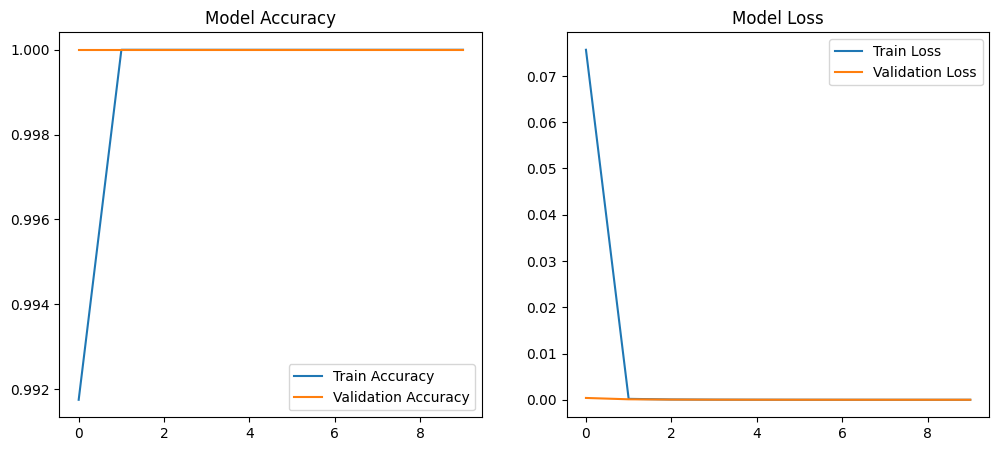

In [17]:

# Plot the accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()

plt.show()
